In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [3]:
conc_0_25 = pd.read_csv("conc_0.25_0.csv",index_col=0)[["log2FoldChange","pvalue"]]
conc_1 = pd.read_csv("conc_1_0.csv",index_col=0)[["log2FoldChange","pvalue"]]
conc_2 = pd.read_csv("conc_2_0.csv",index_col=0)[["log2FoldChange","pvalue"]]
conc_2_5 = pd.read_csv("conc_2.5_0.csv",index_col=0)[["log2FoldChange","pvalue"]]
time_12 = pd.read_csv("time_12_3.csv",index_col=0)[["log2FoldChange","pvalue"]]
time_24 = pd.read_csv("time_24_3.csv",index_col=0)[["log2FoldChange","pvalue"]]
time12_concentration0_25 = pd.read_csv("time12.concentration0.25.csv",index_col=0)[["log2FoldChange","pvalue"]]
time12_concentration1 = pd.read_csv("time12.concentration1.csv",index_col=0)[["log2FoldChange","pvalue"]]
time12_concentration2 = pd.read_csv("time12.concentration2.csv",index_col=0)[["log2FoldChange","pvalue"]]
time12_concentration2_5 = pd.read_csv("time12.concentration2.5.csv",index_col=0)[["log2FoldChange","pvalue"]]
time24_concentration0_25 = pd.read_csv("time24.concentration0.25.csv",index_col=0)[["log2FoldChange","pvalue"]]
time24_concentration1 = pd.read_csv("time24.concentration1.csv",index_col=0)[["log2FoldChange","pvalue"]]
time24_concentration2 = pd.read_csv("time24.concentration2.csv",index_col=0)[["log2FoldChange","pvalue"]]
time24_concentration2_5 = pd.read_csv("time24.concentration2.5.csv",index_col=0)[["log2FoldChange","pvalue"]]

In [4]:
conc_0_25.columns = [ "conc0.25_"+i for i in conc_0_25.columns ]
conc_1.columns = [ "conc1_"+i for i in conc_1.columns ]
conc_2.columns = [ "conc2_"+i for i in conc_2.columns ]
conc_2_5.columns = [ "conc2.5_"+i for i in conc_2_5.columns ]
time_12.columns = [ "time12_"+i for i in time_12.columns ]
time_24.columns = [ "time24_"+i for i in time_24.columns ]
time12_concentration0_25.columns = [ "time12_conc0.25_"+i for i in time12_concentration0_25.columns ]
time12_concentration1.columns = [ "time12_conc1_"+i for i in time12_concentration1.columns ]
time12_concentration2.columns = [ "time12_conc2_"+i for i in time12_concentration2.columns ]
time12_concentration2_5.columns = [ "time12_conc2.5_"+i for i in time12_concentration2_5.columns ]
time24_concentration0_25.columns = [ "time24_conc0.25_"+i for i in time24_concentration0_25.columns ]
time24_concentration1.columns = [ "time24_conc1_"+i for i in time24_concentration1.columns ]
time24_concentration2.columns = [ "time24_conc2_"+i for i in time24_concentration2.columns ]
time24_concentration2_5.columns = [ "time24_conc2.5_"+i for i in time24_concentration2_5.columns ]

In [5]:
time = pd.merge(time_12,time_24,left_index=True, right_index=True, how="outer")
time12 = pd.merge(time12_concentration0_25, time12_concentration1, left_index=True, right_index=True, how="outer")
time12 = pd.merge(time12, time12_concentration2, left_index=True, right_index=True, how="outer")
time12 = pd.merge(time12, time12_concentration2_5, left_index=True, right_index=True, how="outer")
time24 = pd.merge(time24_concentration0_25, time24_concentration1, left_index=True, right_index=True, how="outer")
time24 = pd.merge(time24, time24_concentration2, left_index=True, right_index=True, how="outer")
time24 = pd.merge(time24, time24_concentration2_5, left_index=True, right_index=True, how="outer")
conc = pd.merge(conc_0_25, conc_1, left_index=True, right_index=True, how="outer")
conc = pd.merge(conc, conc_2, left_index=True, right_index=True, how="outer")
conc = pd.merge(conc, conc_2_5, left_index=True, right_index=True, how="outer")

In [6]:
time = time.dropna()
conc = conc.dropna()
time12 = time12.dropna()
time24 = time24.dropna()

In [7]:
ids = time.index.to_list()
time_x = [ 12, 24 ]
conc_x = [ 0.25, 1, 2, 2.5 ]
time_y, conc_y, time12_y, time24_y = list(), list(), list(), list()

In [8]:
for a,b in time.iterrows():
    time_y.append([b[0]-b[0],b[2]-b[0]])

for a,b in conc.iterrows():
    conc_y.append([b[0]-b[0],b[2]-b[0],b[4]-b[0],b[6]-b[0]])

In [9]:
for a,b in time12.iterrows():
    time12_y.append([b[0]-b[0],b[2]-b[0],b[4]-b[0],b[6]-b[0]])

for a,b in time24.iterrows():
    time24_y.append([b[0]-b[0],b[2]-b[0],b[4]-b[0],b[6]-b[0]])

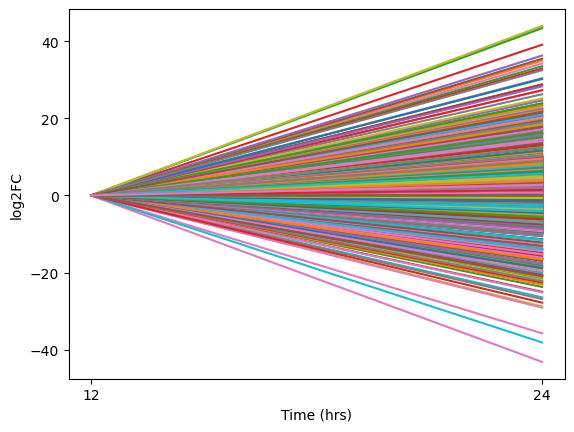

In [10]:
for y in time_y:
    plt.plot([12,24],y)
plt.xlabel("Time (hrs)")
plt.ylabel("log2FC")
plt.xticks([12,24])
plt.show()

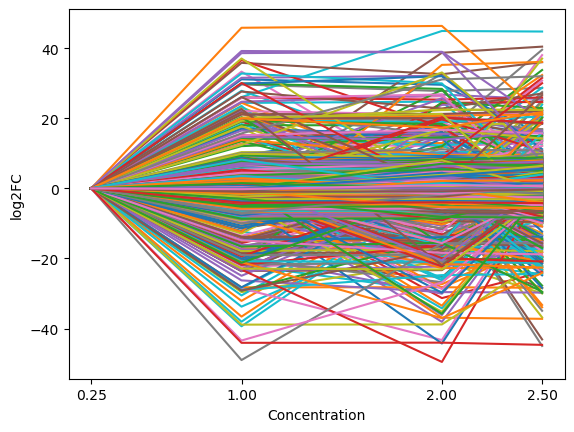

In [11]:
for y in conc_y:
    plt.plot(conc_x,y)
plt.xlabel("Concentration")
plt.ylabel("log2FC")
plt.xticks([0.25,1,2,2.5])
plt.show()

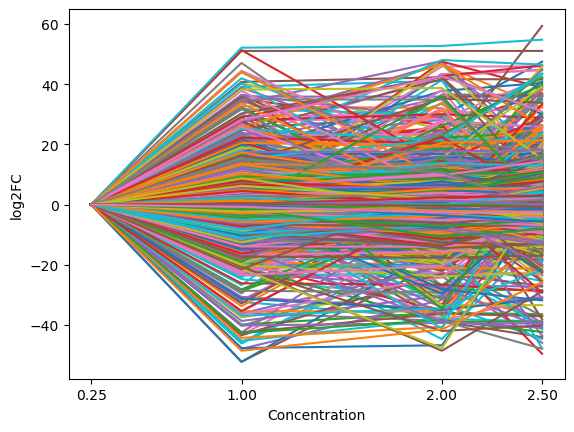

In [12]:
for y in time12_y:
    plt.plot(conc_x,y)
plt.xlabel("Concentration")
plt.ylabel("log2FC")
plt.xticks(conc_x)
plt.show()

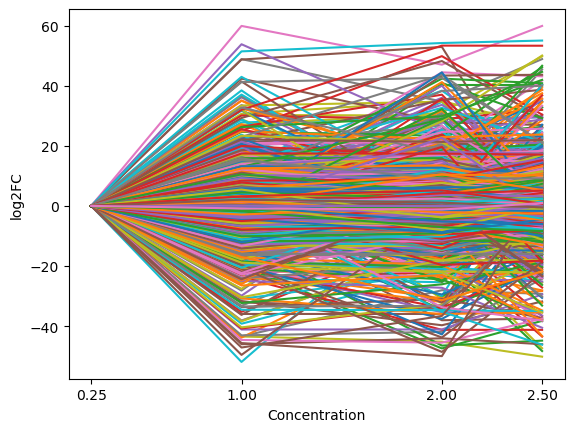

In [13]:
for y in time24_y:
    plt.plot(conc_x,y)
plt.xlabel("Concentration")
plt.ylabel("log2FC")
plt.xticks(conc_x)
plt.show()

In [25]:
time12_24 = pd.concat([time12.iloc[:,[0,2,4,6]], time24.iloc[:,[0,2,4,6]]],axis=1)
time12_24 = time12_24.iloc[:,[0,4,1,5,2,6,3,7]]
ticks = ['time12\nconc0.25', 'time24\nconc0.25', 'time12\nconc1', 'time24\nconc1', 'time12\nconc2', 'time24\nconc2', 'time12\nconc2.5', 'time24\nconc2.5']

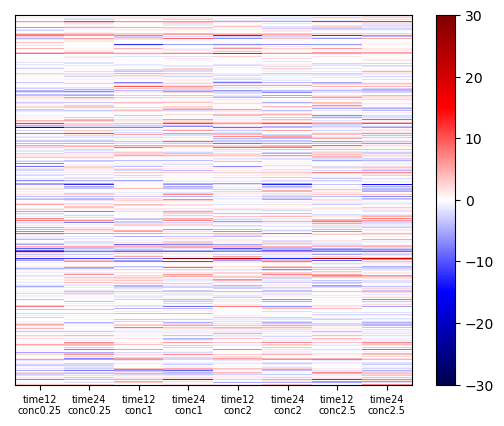

In [31]:
plt.pcolor(time12_24,cmap="seismic")
plt.xticks([0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5], ticks, size=7)
plt.yticks([])
plt.colorbar()